<a href="https://colab.research.google.com/github/Nick-Azzarano/Machine-Learning-Practice/blob/main/Spring2025/Homeworks/HW10_Azzarano_Nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nick Azzarano
<br/>
CSCI 335
<br/>
Anton Selitskiy
<br/>
April 14, 2025

# Homework 10

In this homework, you will implement NN using PyTorch and investigate different activation functions, batch sizes, and learning rates. Use [Lecture code](https://github.com/anton-selitskiy/RIT_ML/blob/main/2025_spring/Week11_MLP/ML21.ipynb) as refference.

Use load_planar_dataset function from the previous homework to create the data.

In [379]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [380]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros(m, dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius. 4 corresponds to the number of petals
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

In [381]:
x, y = load_planar_dataset()  #make_moons(n_samples=200, noise=0.1)  make_circles(n_samples=200, noise=0.1)
y = y.reshape(-1,1)
x.shape, y.shape

((400, 2), (400, 1))

In [382]:
x[:,0]

array([ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,  3.49178475e-01,
        6.94150378e-01,  1.62065038e+00,  1.53856225e+00,  3.63085641e-02,
        4.74591109e-01,  1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
        2.61695163e-01,  2.31614896e-01,  1.58013020e+00,  6.35509950e-03,
        6.80610419e-01,  1.21400432e-01,  1.13281261e+00,  1.61505892e+00,
        1.66454441e-01,  1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
        1.54661332e+00,  9.84590400e-01,  1.45313345e+00,  7.49043388e-01,
        1.45048341e+00,  1.64287865e+00,  1.28141487e+00,  1.59574104e+00,
        1.46298294e+00,  1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
        1.22995404e+00,  1.31142345e+00, -1.99364553e+00,  3.94564752e-01,
        1.51715449e+00,  1.69169139e+00,  1.74186686e+00, -2.91373382e+00,
        7.52150898e-01,  1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
        3.52484080e-01, -1.48694206e+00, -7.45290416e-01,  5.63807442e-01,
        1.27093179e+00,  

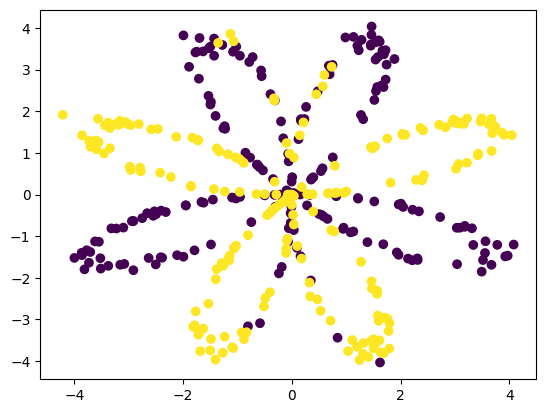

In [383]:
plt.scatter(x[:,0], x[:,1], c=y)

##1. (2 pt) Create Dataset object.

In [384]:
class MyData(Dataset):
    def __init__(self, x, y):
        """
        Initialize the dataset with features (x) and labels (y).
        """
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return len(self.x)

    def __getitem__(self, idx):
        """
        Retrieve a single sample (features and label) by index.
        """
        return self.x[idx], self.y[idx]

In [385]:
data = MyData(x,y)

In [386]:
data.__len__()

400

In [387]:
data.__getitem__(0)

(tensor([1.2044, 3.5761]), tensor([0.]))

## 2. (1 pt) Create DataLoader object.

In [388]:
data_loader = DataLoader(data, batch_size=16, shuffle=True)

In [389]:
for x_batch, y_batch in data_loader:
  print(x_batch.shape, y_batch.shape)

torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])


## 3. (3 pt) Construct the model
$$
hidden\_1 \to activation\_1 \to hidden\_2 \to activation\_2  
$$
Use `Sigmoid` function as activation on this step.

In [390]:
import torch.nn as nn

In [391]:
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_1_size, hidden_2_size, activation_func_1, activation_func_2):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_1_size)
        self.activation_1 = activation_func_1
        self.fc2 = nn.Linear(hidden_1_size, hidden_2_size)
        self.activation_2 = activation_func_2
        self.output = nn.Linear(hidden_2_size, 1)
        self.output_activation = activation_func_2  # Add Sigmoid for the output layer

    def forward(self, x_batch):
        o = self.fc1(x_batch)
        o = self.activation_1(o)
        o = self.fc2(o)
        o = self.activation_2(o)
        o = self.output(o)
        o = self.output_activation(o)  # Apply Sigmoid here
        return o

In [392]:
input_size = 2
hidden_1_size = 4
hidden_2_size = 3
activation_func_1 = nn.Sigmoid()
activation_func_2 = nn.Sigmoid()
my_model = MyModel(input_size, hidden_1_size, hidden_2_size, activation_func_1, activation_func_2)

## 4. (3 pt) Write the training loop. Use Binary cross-entropy loss. Also, you can use tqdm function to see the training progress. You can start with learning rate 0.01.

In [393]:
from torch.nn import BCELoss
from tqdm import tqdm

In [394]:
# Initialize the loss function
loss_fn = BCELoss()

In [395]:
# Initialize the optimizer
from torch.optim import Adam
optimizer = Adam(my_model.parameters(), lr=0.01)

In [396]:
for batch in data_loader:
  x_batch, y_batch = batch
  print(x_batch.shape, y_batch.shape)

torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])


In [397]:
# Initialize a list to store the loss for each epoch
loss_history = []

# Training loop
epochs = 300  # Number of epochs
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        x_batch, y_batch = batch

        # Forward pass
        predictions = my_model.forward(x_batch)
        loss = loss_fn(predictions, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

    # Store the average loss for this epoch
    loss_history.append(epoch_loss / len(data_loader))
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1/300: 100%|██████████| 25/25 [00:00<00:00, 706.68it/s]


Epoch 1, Loss: 17.4457


Epoch 2/300: 100%|██████████| 25/25 [00:00<00:00, 672.17it/s]


Epoch 2, Loss: 17.3012


Epoch 3/300: 100%|██████████| 25/25 [00:00<00:00, 644.98it/s]


Epoch 3, Loss: 17.2836


Epoch 4/300: 100%|██████████| 25/25 [00:00<00:00, 688.54it/s]


Epoch 4, Loss: 17.1664


Epoch 5/300: 100%|██████████| 25/25 [00:00<00:00, 706.29it/s]


Epoch 5, Loss: 17.0545


Epoch 6/300: 100%|██████████| 25/25 [00:00<00:00, 649.41it/s]


Epoch 6, Loss: 16.8813


Epoch 7/300: 100%|██████████| 25/25 [00:00<00:00, 656.01it/s]


Epoch 7, Loss: 16.7222


Epoch 8/300: 100%|██████████| 25/25 [00:00<00:00, 627.93it/s]


Epoch 8, Loss: 16.5196


Epoch 9/300: 100%|██████████| 25/25 [00:00<00:00, 643.31it/s]


Epoch 9, Loss: 16.3781


Epoch 10/300: 100%|██████████| 25/25 [00:00<00:00, 650.70it/s]


Epoch 10, Loss: 16.2552


Epoch 11/300: 100%|██████████| 25/25 [00:00<00:00, 660.04it/s]


Epoch 11, Loss: 16.1583


Epoch 12/300: 100%|██████████| 25/25 [00:00<00:00, 652.09it/s]


Epoch 12, Loss: 16.0685


Epoch 13/300: 100%|██████████| 25/25 [00:00<00:00, 531.38it/s]


Epoch 13, Loss: 15.9815


Epoch 14/300: 100%|██████████| 25/25 [00:00<00:00, 620.27it/s]


Epoch 14, Loss: 15.8797


Epoch 15/300: 100%|██████████| 25/25 [00:00<00:00, 571.78it/s]


Epoch 15, Loss: 15.8259


Epoch 16/300: 100%|██████████| 25/25 [00:00<00:00, 645.21it/s]


Epoch 16, Loss: 15.7267


Epoch 17/300: 100%|██████████| 25/25 [00:00<00:00, 658.18it/s]


Epoch 17, Loss: 15.6459


Epoch 18/300: 100%|██████████| 25/25 [00:00<00:00, 639.14it/s]


Epoch 18, Loss: 15.5526


Epoch 19/300: 100%|██████████| 25/25 [00:00<00:00, 516.60it/s]


Epoch 19, Loss: 15.4848


Epoch 20/300: 100%|██████████| 25/25 [00:00<00:00, 619.08it/s]


Epoch 20, Loss: 15.4330


Epoch 21/300: 100%|██████████| 25/25 [00:00<00:00, 663.98it/s]


Epoch 21, Loss: 15.3196


Epoch 22/300: 100%|██████████| 25/25 [00:00<00:00, 640.79it/s]


Epoch 22, Loss: 15.2713


Epoch 23/300: 100%|██████████| 25/25 [00:00<00:00, 648.95it/s]


Epoch 23, Loss: 15.2085


Epoch 24/300: 100%|██████████| 25/25 [00:00<00:00, 667.53it/s]


Epoch 24, Loss: 15.1663


Epoch 25/300: 100%|██████████| 25/25 [00:00<00:00, 679.99it/s]


Epoch 25, Loss: 15.1078


Epoch 26/300: 100%|██████████| 25/25 [00:00<00:00, 690.50it/s]


Epoch 26, Loss: 15.0975


Epoch 27/300: 100%|██████████| 25/25 [00:00<00:00, 674.76it/s]


Epoch 27, Loss: 15.0730


Epoch 28/300: 100%|██████████| 25/25 [00:00<00:00, 644.09it/s]


Epoch 28, Loss: 15.0134


Epoch 29/300: 100%|██████████| 25/25 [00:00<00:00, 654.21it/s]


Epoch 29, Loss: 14.9828


Epoch 30/300: 100%|██████████| 25/25 [00:00<00:00, 631.73it/s]


Epoch 30, Loss: 14.9701


Epoch 31/300: 100%|██████████| 25/25 [00:00<00:00, 569.23it/s]


Epoch 31, Loss: 14.9304


Epoch 32/300: 100%|██████████| 25/25 [00:00<00:00, 657.54it/s]


Epoch 32, Loss: 14.9115


Epoch 33/300: 100%|██████████| 25/25 [00:00<00:00, 665.25it/s]


Epoch 33, Loss: 14.9163


Epoch 34/300: 100%|██████████| 25/25 [00:00<00:00, 662.77it/s]


Epoch 34, Loss: 14.8892


Epoch 35/300: 100%|██████████| 25/25 [00:00<00:00, 605.17it/s]


Epoch 35, Loss: 14.8773


Epoch 36/300: 100%|██████████| 25/25 [00:00<00:00, 594.55it/s]


Epoch 36, Loss: 14.9354


Epoch 37/300: 100%|██████████| 25/25 [00:00<00:00, 614.09it/s]


Epoch 37, Loss: 14.9187


Epoch 38/300: 100%|██████████| 25/25 [00:00<00:00, 624.25it/s]


Epoch 38, Loss: 14.8856


Epoch 39/300: 100%|██████████| 25/25 [00:00<00:00, 672.10it/s]


Epoch 39, Loss: 14.8577


Epoch 40/300: 100%|██████████| 25/25 [00:00<00:00, 677.53it/s]


Epoch 40, Loss: 14.8254


Epoch 41/300: 100%|██████████| 25/25 [00:00<00:00, 644.80it/s]


Epoch 41, Loss: 14.8373


Epoch 42/300: 100%|██████████| 25/25 [00:00<00:00, 653.31it/s]


Epoch 42, Loss: 14.8300


Epoch 43/300: 100%|██████████| 25/25 [00:00<00:00, 518.25it/s]


Epoch 43, Loss: 14.8457


Epoch 44/300: 100%|██████████| 25/25 [00:00<00:00, 663.61it/s]


Epoch 44, Loss: 14.8021


Epoch 45/300: 100%|██████████| 25/25 [00:00<00:00, 664.94it/s]


Epoch 45, Loss: 14.7991


Epoch 46/300: 100%|██████████| 25/25 [00:00<00:00, 667.36it/s]


Epoch 46, Loss: 14.8017


Epoch 47/300: 100%|██████████| 25/25 [00:00<00:00, 692.63it/s]


Epoch 47, Loss: 14.8015


Epoch 48/300: 100%|██████████| 25/25 [00:00<00:00, 692.03it/s]


Epoch 48, Loss: 14.8122


Epoch 49/300: 100%|██████████| 25/25 [00:00<00:00, 621.95it/s]


Epoch 49, Loss: 14.7798


Epoch 50/300: 100%|██████████| 25/25 [00:00<00:00, 656.69it/s]


Epoch 50, Loss: 14.7758


Epoch 51/300: 100%|██████████| 25/25 [00:00<00:00, 665.65it/s]


Epoch 51, Loss: 14.7770


Epoch 52/300: 100%|██████████| 25/25 [00:00<00:00, 633.60it/s]


Epoch 52, Loss: 14.7671


Epoch 53/300: 100%|██████████| 25/25 [00:00<00:00, 667.72it/s]


Epoch 53, Loss: 14.7615


Epoch 54/300: 100%|██████████| 25/25 [00:00<00:00, 579.70it/s]


Epoch 54, Loss: 14.7535


Epoch 55/300: 100%|██████████| 25/25 [00:00<00:00, 461.96it/s]


Epoch 55, Loss: 14.8400


Epoch 56/300: 100%|██████████| 25/25 [00:00<00:00, 513.30it/s]


Epoch 56, Loss: 14.7571


Epoch 57/300: 100%|██████████| 25/25 [00:00<00:00, 665.72it/s]


Epoch 57, Loss: 14.7685


Epoch 58/300: 100%|██████████| 25/25 [00:00<00:00, 676.50it/s]


Epoch 58, Loss: 14.7517


Epoch 59/300: 100%|██████████| 25/25 [00:00<00:00, 611.50it/s]


Epoch 59, Loss: 14.7344


Epoch 60/300: 100%|██████████| 25/25 [00:00<00:00, 619.35it/s]


Epoch 60, Loss: 14.7389


Epoch 61/300: 100%|██████████| 25/25 [00:00<00:00, 662.26it/s]


Epoch 61, Loss: 14.7323


Epoch 62/300: 100%|██████████| 25/25 [00:00<00:00, 638.81it/s]


Epoch 62, Loss: 14.8062


Epoch 63/300: 100%|██████████| 25/25 [00:00<00:00, 695.66it/s]


Epoch 63, Loss: 14.7094


Epoch 64/300: 100%|██████████| 25/25 [00:00<00:00, 675.54it/s]


Epoch 64, Loss: 14.7230


Epoch 65/300: 100%|██████████| 25/25 [00:00<00:00, 673.31it/s]


Epoch 65, Loss: 14.7068


Epoch 66/300: 100%|██████████| 25/25 [00:00<00:00, 542.74it/s]


Epoch 66, Loss: 14.7164


Epoch 67/300: 100%|██████████| 25/25 [00:00<00:00, 671.11it/s]


Epoch 67, Loss: 14.7028


Epoch 68/300: 100%|██████████| 25/25 [00:00<00:00, 673.55it/s]


Epoch 68, Loss: 14.7040


Epoch 69/300: 100%|██████████| 25/25 [00:00<00:00, 652.84it/s]


Epoch 69, Loss: 14.7233


Epoch 70/300: 100%|██████████| 25/25 [00:00<00:00, 677.30it/s]


Epoch 70, Loss: 14.7305


Epoch 71/300: 100%|██████████| 25/25 [00:00<00:00, 701.18it/s]


Epoch 71, Loss: 14.6766


Epoch 72/300: 100%|██████████| 25/25 [00:00<00:00, 678.40it/s]


Epoch 72, Loss: 14.7137


Epoch 73/300: 100%|██████████| 25/25 [00:00<00:00, 611.26it/s]


Epoch 73, Loss: 14.6941


Epoch 74/300: 100%|██████████| 25/25 [00:00<00:00, 553.67it/s]


Epoch 74, Loss: 14.6857


Epoch 75/300: 100%|██████████| 25/25 [00:00<00:00, 625.98it/s]


Epoch 75, Loss: 14.6976


Epoch 76/300: 100%|██████████| 25/25 [00:00<00:00, 620.29it/s]


Epoch 76, Loss: 14.7019


Epoch 77/300: 100%|██████████| 25/25 [00:00<00:00, 464.14it/s]


Epoch 77, Loss: 14.6647


Epoch 78/300: 100%|██████████| 25/25 [00:00<00:00, 574.70it/s]


Epoch 78, Loss: 14.6732


Epoch 79/300: 100%|██████████| 25/25 [00:00<00:00, 632.59it/s]


Epoch 79, Loss: 14.7227


Epoch 80/300: 100%|██████████| 25/25 [00:00<00:00, 599.73it/s]


Epoch 80, Loss: 14.6954


Epoch 81/300: 100%|██████████| 25/25 [00:00<00:00, 667.07it/s]


Epoch 81, Loss: 14.6515


Epoch 82/300: 100%|██████████| 25/25 [00:00<00:00, 651.64it/s]


Epoch 82, Loss: 14.6813


Epoch 83/300: 100%|██████████| 25/25 [00:00<00:00, 613.27it/s]


Epoch 83, Loss: 14.6277


Epoch 84/300: 100%|██████████| 25/25 [00:00<00:00, 686.43it/s]


Epoch 84, Loss: 14.6444


Epoch 85/300: 100%|██████████| 25/25 [00:00<00:00, 605.33it/s]


Epoch 85, Loss: 14.6721


Epoch 86/300: 100%|██████████| 25/25 [00:00<00:00, 673.44it/s]


Epoch 86, Loss: 14.6547


Epoch 87/300: 100%|██████████| 25/25 [00:00<00:00, 645.52it/s]


Epoch 87, Loss: 14.6322


Epoch 88/300: 100%|██████████| 25/25 [00:00<00:00, 654.75it/s]


Epoch 88, Loss: 14.6228


Epoch 89/300: 100%|██████████| 25/25 [00:00<00:00, 496.02it/s]


Epoch 89, Loss: 14.6507


Epoch 90/300: 100%|██████████| 25/25 [00:00<00:00, 603.52it/s]


Epoch 90, Loss: 14.6218


Epoch 91/300: 100%|██████████| 25/25 [00:00<00:00, 651.10it/s]


Epoch 91, Loss: 14.6207


Epoch 92/300: 100%|██████████| 25/25 [00:00<00:00, 684.65it/s]


Epoch 92, Loss: 14.6136


Epoch 93/300: 100%|██████████| 25/25 [00:00<00:00, 630.76it/s]


Epoch 93, Loss: 14.6258


Epoch 94/300: 100%|██████████| 25/25 [00:00<00:00, 661.24it/s]


Epoch 94, Loss: 14.6058


Epoch 95/300: 100%|██████████| 25/25 [00:00<00:00, 693.00it/s]


Epoch 95, Loss: 14.6733


Epoch 96/300: 100%|██████████| 25/25 [00:00<00:00, 648.13it/s]


Epoch 96, Loss: 14.6047


Epoch 97/300: 100%|██████████| 25/25 [00:00<00:00, 589.65it/s]


Epoch 97, Loss: 14.6482


Epoch 98/300: 100%|██████████| 25/25 [00:00<00:00, 664.88it/s]


Epoch 98, Loss: 14.6294


Epoch 99/300: 100%|██████████| 25/25 [00:00<00:00, 655.20it/s]


Epoch 99, Loss: 14.6006


Epoch 100/300: 100%|██████████| 25/25 [00:00<00:00, 641.59it/s]


Epoch 100, Loss: 14.6253


Epoch 101/300: 100%|██████████| 25/25 [00:00<00:00, 578.47it/s]


Epoch 101, Loss: 14.5946


Epoch 102/300: 100%|██████████| 25/25 [00:00<00:00, 512.61it/s]


Epoch 102, Loss: 14.5921


Epoch 103/300: 100%|██████████| 25/25 [00:00<00:00, 484.68it/s]


Epoch 103, Loss: 14.5940


Epoch 104/300: 100%|██████████| 25/25 [00:00<00:00, 483.49it/s]


Epoch 104, Loss: 14.5968


Epoch 105/300: 100%|██████████| 25/25 [00:00<00:00, 475.27it/s]


Epoch 105, Loss: 14.6103


Epoch 106/300: 100%|██████████| 25/25 [00:00<00:00, 628.83it/s]


Epoch 106, Loss: 14.5924


Epoch 107/300: 100%|██████████| 25/25 [00:00<00:00, 624.54it/s]


Epoch 107, Loss: 14.7052


Epoch 108/300: 100%|██████████| 25/25 [00:00<00:00, 628.47it/s]


Epoch 108, Loss: 14.5605


Epoch 109/300: 100%|██████████| 25/25 [00:00<00:00, 478.72it/s]


Epoch 109, Loss: 14.5670


Epoch 110/300: 100%|██████████| 25/25 [00:00<00:00, 577.37it/s]


Epoch 110, Loss: 14.5930


Epoch 111/300: 100%|██████████| 25/25 [00:00<00:00, 462.45it/s]


Epoch 111, Loss: 14.6085


Epoch 112/300: 100%|██████████| 25/25 [00:00<00:00, 660.80it/s]


Epoch 112, Loss: 14.5736


Epoch 113/300: 100%|██████████| 25/25 [00:00<00:00, 642.95it/s]


Epoch 113, Loss: 14.5505


Epoch 114/300: 100%|██████████| 25/25 [00:00<00:00, 598.42it/s]


Epoch 114, Loss: 14.5567


Epoch 115/300: 100%|██████████| 25/25 [00:00<00:00, 617.39it/s]


Epoch 115, Loss: 14.5558


Epoch 116/300: 100%|██████████| 25/25 [00:00<00:00, 628.34it/s]


Epoch 116, Loss: 14.5636


Epoch 117/300: 100%|██████████| 25/25 [00:00<00:00, 609.31it/s]


Epoch 117, Loss: 14.5478


Epoch 118/300: 100%|██████████| 25/25 [00:00<00:00, 659.80it/s]


Epoch 118, Loss: 14.5598


Epoch 119/300: 100%|██████████| 25/25 [00:00<00:00, 664.35it/s]


Epoch 119, Loss: 14.5697


Epoch 120/300: 100%|██████████| 25/25 [00:00<00:00, 614.43it/s]


Epoch 120, Loss: 14.5522


Epoch 121/300: 100%|██████████| 25/25 [00:00<00:00, 647.18it/s]


Epoch 121, Loss: 14.5392


Epoch 122/300: 100%|██████████| 25/25 [00:00<00:00, 603.44it/s]


Epoch 122, Loss: 14.5390


Epoch 123/300: 100%|██████████| 25/25 [00:00<00:00, 614.68it/s]


Epoch 123, Loss: 14.5681


Epoch 124/300: 100%|██████████| 25/25 [00:00<00:00, 560.14it/s]


Epoch 124, Loss: 14.5542


Epoch 125/300: 100%|██████████| 25/25 [00:00<00:00, 659.54it/s]


Epoch 125, Loss: 14.5172


Epoch 126/300: 100%|██████████| 25/25 [00:00<00:00, 591.05it/s]


Epoch 126, Loss: 14.5342


Epoch 127/300: 100%|██████████| 25/25 [00:00<00:00, 678.47it/s]


Epoch 127, Loss: 14.5436


Epoch 128/300: 100%|██████████| 25/25 [00:00<00:00, 640.52it/s]


Epoch 128, Loss: 14.5608


Epoch 129/300: 100%|██████████| 25/25 [00:00<00:00, 578.46it/s]


Epoch 129, Loss: 14.5297


Epoch 130/300: 100%|██████████| 25/25 [00:00<00:00, 700.65it/s]


Epoch 130, Loss: 14.5483


Epoch 131/300: 100%|██████████| 25/25 [00:00<00:00, 616.19it/s]


Epoch 131, Loss: 14.5378


Epoch 132/300: 100%|██████████| 25/25 [00:00<00:00, 603.35it/s]


Epoch 132, Loss: 14.5262


Epoch 133/300: 100%|██████████| 25/25 [00:00<00:00, 652.24it/s]


Epoch 133, Loss: 14.4954


Epoch 134/300: 100%|██████████| 25/25 [00:00<00:00, 521.84it/s]


Epoch 134, Loss: 14.5185


Epoch 135/300: 100%|██████████| 25/25 [00:00<00:00, 668.96it/s]


Epoch 135, Loss: 14.5045


Epoch 136/300: 100%|██████████| 25/25 [00:00<00:00, 624.13it/s]


Epoch 136, Loss: 14.5111


Epoch 137/300: 100%|██████████| 25/25 [00:00<00:00, 682.39it/s]


Epoch 137, Loss: 14.5294


Epoch 138/300: 100%|██████████| 25/25 [00:00<00:00, 633.42it/s]


Epoch 138, Loss: 14.5531


Epoch 139/300: 100%|██████████| 25/25 [00:00<00:00, 631.98it/s]


Epoch 139, Loss: 14.5025


Epoch 140/300: 100%|██████████| 25/25 [00:00<00:00, 614.78it/s]


Epoch 140, Loss: 14.5003


Epoch 141/300: 100%|██████████| 25/25 [00:00<00:00, 601.50it/s]


Epoch 141, Loss: 14.5076


Epoch 142/300: 100%|██████████| 25/25 [00:00<00:00, 559.07it/s]


Epoch 142, Loss: 14.5070


Epoch 143/300: 100%|██████████| 25/25 [00:00<00:00, 589.94it/s]


Epoch 143, Loss: 14.4978


Epoch 144/300: 100%|██████████| 25/25 [00:00<00:00, 525.41it/s]


Epoch 144, Loss: 14.5042


Epoch 145/300: 100%|██████████| 25/25 [00:00<00:00, 515.43it/s]


Epoch 145, Loss: 14.4880


Epoch 146/300: 100%|██████████| 25/25 [00:00<00:00, 595.44it/s]


Epoch 146, Loss: 14.5154


Epoch 147/300: 100%|██████████| 25/25 [00:00<00:00, 605.39it/s]


Epoch 147, Loss: 14.4997


Epoch 148/300: 100%|██████████| 25/25 [00:00<00:00, 622.72it/s]


Epoch 148, Loss: 14.4795


Epoch 149/300: 100%|██████████| 25/25 [00:00<00:00, 624.18it/s]


Epoch 149, Loss: 14.5039


Epoch 150/300: 100%|██████████| 25/25 [00:00<00:00, 652.51it/s]


Epoch 150, Loss: 14.4833


Epoch 151/300: 100%|██████████| 25/25 [00:00<00:00, 631.50it/s]


Epoch 151, Loss: 14.4762


Epoch 152/300: 100%|██████████| 25/25 [00:00<00:00, 600.94it/s]


Epoch 152, Loss: 14.4824


Epoch 153/300: 100%|██████████| 25/25 [00:00<00:00, 619.26it/s]


Epoch 153, Loss: 14.4863


Epoch 154/300: 100%|██████████| 25/25 [00:00<00:00, 602.90it/s]


Epoch 154, Loss: 14.4796


Epoch 155/300: 100%|██████████| 25/25 [00:00<00:00, 578.52it/s]


Epoch 155, Loss: 14.4619


Epoch 156/300: 100%|██████████| 25/25 [00:00<00:00, 475.84it/s]


Epoch 156, Loss: 14.5112


Epoch 157/300: 100%|██████████| 25/25 [00:00<00:00, 620.39it/s]


Epoch 157, Loss: 14.4662


Epoch 158/300: 100%|██████████| 25/25 [00:00<00:00, 625.70it/s]


Epoch 158, Loss: 14.4742


Epoch 159/300: 100%|██████████| 25/25 [00:00<00:00, 628.00it/s]


Epoch 159, Loss: 14.4677


Epoch 160/300: 100%|██████████| 25/25 [00:00<00:00, 594.25it/s]


Epoch 160, Loss: 14.4552


Epoch 161/300: 100%|██████████| 25/25 [00:00<00:00, 628.92it/s]


Epoch 161, Loss: 14.4464


Epoch 162/300: 100%|██████████| 25/25 [00:00<00:00, 610.97it/s]


Epoch 162, Loss: 14.4352


Epoch 163/300: 100%|██████████| 25/25 [00:00<00:00, 640.92it/s]


Epoch 163, Loss: 14.4034


Epoch 164/300: 100%|██████████| 25/25 [00:00<00:00, 545.51it/s]


Epoch 164, Loss: 14.3832


Epoch 165/300: 100%|██████████| 25/25 [00:00<00:00, 602.44it/s]


Epoch 165, Loss: 14.3438


Epoch 166/300: 100%|██████████| 25/25 [00:00<00:00, 626.06it/s]


Epoch 166, Loss: 14.2585


Epoch 167/300: 100%|██████████| 25/25 [00:00<00:00, 598.16it/s]


Epoch 167, Loss: 14.1750


Epoch 168/300: 100%|██████████| 25/25 [00:00<00:00, 527.53it/s]


Epoch 168, Loss: 14.0759


Epoch 169/300: 100%|██████████| 25/25 [00:00<00:00, 579.36it/s]


Epoch 169, Loss: 13.9242


Epoch 170/300: 100%|██████████| 25/25 [00:00<00:00, 612.46it/s]


Epoch 170, Loss: 13.5735


Epoch 171/300: 100%|██████████| 25/25 [00:00<00:00, 674.93it/s]


Epoch 171, Loss: 13.2292


Epoch 172/300: 100%|██████████| 25/25 [00:00<00:00, 559.83it/s]


Epoch 172, Loss: 12.8741


Epoch 173/300: 100%|██████████| 25/25 [00:00<00:00, 647.74it/s]


Epoch 173, Loss: 12.4539


Epoch 174/300: 100%|██████████| 25/25 [00:00<00:00, 599.85it/s]


Epoch 174, Loss: 12.0291


Epoch 175/300: 100%|██████████| 25/25 [00:00<00:00, 656.66it/s]


Epoch 175, Loss: 11.6392


Epoch 176/300: 100%|██████████| 25/25 [00:00<00:00, 631.17it/s]


Epoch 176, Loss: 11.2640


Epoch 177/300: 100%|██████████| 25/25 [00:00<00:00, 556.49it/s]


Epoch 177, Loss: 10.9124


Epoch 178/300: 100%|██████████| 25/25 [00:00<00:00, 520.09it/s]


Epoch 178, Loss: 10.6025


Epoch 179/300: 100%|██████████| 25/25 [00:00<00:00, 627.94it/s]


Epoch 179, Loss: 10.3069


Epoch 180/300: 100%|██████████| 25/25 [00:00<00:00, 610.59it/s]


Epoch 180, Loss: 10.0568


Epoch 181/300: 100%|██████████| 25/25 [00:00<00:00, 642.81it/s]


Epoch 181, Loss: 9.9001


Epoch 182/300: 100%|██████████| 25/25 [00:00<00:00, 555.10it/s]


Epoch 182, Loss: 9.6600


Epoch 183/300: 100%|██████████| 25/25 [00:00<00:00, 627.13it/s]


Epoch 183, Loss: 9.5368


Epoch 184/300: 100%|██████████| 25/25 [00:00<00:00, 624.11it/s]


Epoch 184, Loss: 9.2591


Epoch 185/300: 100%|██████████| 25/25 [00:00<00:00, 615.45it/s]


Epoch 185, Loss: 9.1049


Epoch 186/300: 100%|██████████| 25/25 [00:00<00:00, 647.27it/s]


Epoch 186, Loss: 8.9577


Epoch 187/300: 100%|██████████| 25/25 [00:00<00:00, 625.27it/s]


Epoch 187, Loss: 8.8729


Epoch 188/300: 100%|██████████| 25/25 [00:00<00:00, 547.34it/s]


Epoch 188, Loss: 8.7331


Epoch 189/300: 100%|██████████| 25/25 [00:00<00:00, 637.58it/s]


Epoch 189, Loss: 8.6643


Epoch 190/300: 100%|██████████| 25/25 [00:00<00:00, 585.74it/s]


Epoch 190, Loss: 8.5296


Epoch 191/300: 100%|██████████| 25/25 [00:00<00:00, 623.22it/s]


Epoch 191, Loss: 8.5047


Epoch 192/300: 100%|██████████| 25/25 [00:00<00:00, 592.20it/s]


Epoch 192, Loss: 8.5160


Epoch 193/300: 100%|██████████| 25/25 [00:00<00:00, 634.06it/s]


Epoch 193, Loss: 8.3756


Epoch 194/300: 100%|██████████| 25/25 [00:00<00:00, 613.27it/s]


Epoch 194, Loss: 8.2706


Epoch 195/300: 100%|██████████| 25/25 [00:00<00:00, 601.01it/s]


Epoch 195, Loss: 8.2444


Epoch 196/300: 100%|██████████| 25/25 [00:00<00:00, 648.81it/s]


Epoch 196, Loss: 8.1581


Epoch 197/300: 100%|██████████| 25/25 [00:00<00:00, 665.89it/s]


Epoch 197, Loss: 8.1648


Epoch 198/300: 100%|██████████| 25/25 [00:00<00:00, 646.78it/s]


Epoch 198, Loss: 8.1415


Epoch 199/300: 100%|██████████| 25/25 [00:00<00:00, 543.97it/s]


Epoch 199, Loss: 8.0994


Epoch 200/300: 100%|██████████| 25/25 [00:00<00:00, 570.46it/s]


Epoch 200, Loss: 8.0133


Epoch 201/300: 100%|██████████| 25/25 [00:00<00:00, 498.44it/s]


Epoch 201, Loss: 7.9832


Epoch 202/300: 100%|██████████| 25/25 [00:00<00:00, 606.38it/s]


Epoch 202, Loss: 7.9284


Epoch 203/300: 100%|██████████| 25/25 [00:00<00:00, 645.94it/s]


Epoch 203, Loss: 7.9118


Epoch 204/300: 100%|██████████| 25/25 [00:00<00:00, 610.46it/s]


Epoch 204, Loss: 7.8511


Epoch 205/300: 100%|██████████| 25/25 [00:00<00:00, 607.17it/s]


Epoch 205, Loss: 7.8452


Epoch 206/300: 100%|██████████| 25/25 [00:00<00:00, 574.43it/s]


Epoch 206, Loss: 7.8429


Epoch 207/300: 100%|██████████| 25/25 [00:00<00:00, 609.70it/s]


Epoch 207, Loss: 7.8268


Epoch 208/300: 100%|██████████| 25/25 [00:00<00:00, 594.06it/s]


Epoch 208, Loss: 7.8256


Epoch 209/300: 100%|██████████| 25/25 [00:00<00:00, 498.58it/s]


Epoch 209, Loss: 7.8170


Epoch 210/300: 100%|██████████| 25/25 [00:00<00:00, 536.66it/s]


Epoch 210, Loss: 7.7508


Epoch 211/300: 100%|██████████| 25/25 [00:00<00:00, 583.58it/s]


Epoch 211, Loss: 7.7189


Epoch 212/300: 100%|██████████| 25/25 [00:00<00:00, 565.65it/s]


Epoch 212, Loss: 7.7303


Epoch 213/300: 100%|██████████| 25/25 [00:00<00:00, 605.79it/s]


Epoch 213, Loss: 7.7237


Epoch 214/300: 100%|██████████| 25/25 [00:00<00:00, 636.62it/s]


Epoch 214, Loss: 7.6906


Epoch 215/300: 100%|██████████| 25/25 [00:00<00:00, 462.60it/s]


Epoch 215, Loss: 7.6416


Epoch 216/300: 100%|██████████| 25/25 [00:00<00:00, 437.04it/s]


Epoch 216, Loss: 7.6352


Epoch 217/300: 100%|██████████| 25/25 [00:00<00:00, 435.45it/s]


Epoch 217, Loss: 7.6495


Epoch 218/300: 100%|██████████| 25/25 [00:00<00:00, 469.38it/s]


Epoch 218, Loss: 7.6441


Epoch 219/300: 100%|██████████| 25/25 [00:00<00:00, 466.32it/s]


Epoch 219, Loss: 7.6036


Epoch 220/300: 100%|██████████| 25/25 [00:00<00:00, 478.48it/s]


Epoch 220, Loss: 7.5983


Epoch 221/300: 100%|██████████| 25/25 [00:00<00:00, 450.13it/s]


Epoch 221, Loss: 7.5982


Epoch 222/300: 100%|██████████| 25/25 [00:00<00:00, 498.06it/s]


Epoch 222, Loss: 7.6379


Epoch 223/300: 100%|██████████| 25/25 [00:00<00:00, 423.16it/s]


Epoch 223, Loss: 7.5694


Epoch 224/300: 100%|██████████| 25/25 [00:00<00:00, 406.73it/s]


Epoch 224, Loss: 7.5486


Epoch 225/300: 100%|██████████| 25/25 [00:00<00:00, 291.38it/s]


Epoch 225, Loss: 7.5587


Epoch 226/300: 100%|██████████| 25/25 [00:00<00:00, 289.69it/s]


Epoch 226, Loss: 7.5543


Epoch 227/300: 100%|██████████| 25/25 [00:00<00:00, 379.43it/s]


Epoch 227, Loss: 7.5247


Epoch 228/300: 100%|██████████| 25/25 [00:00<00:00, 518.11it/s]


Epoch 228, Loss: 7.5283


Epoch 229/300: 100%|██████████| 25/25 [00:00<00:00, 504.75it/s]


Epoch 229, Loss: 7.5057


Epoch 230/300: 100%|██████████| 25/25 [00:00<00:00, 541.91it/s]


Epoch 230, Loss: 7.4852


Epoch 231/300: 100%|██████████| 25/25 [00:00<00:00, 553.27it/s]


Epoch 231, Loss: 7.4783


Epoch 232/300: 100%|██████████| 25/25 [00:00<00:00, 559.37it/s]


Epoch 232, Loss: 7.6933


Epoch 233/300: 100%|██████████| 25/25 [00:00<00:00, 483.29it/s]


Epoch 233, Loss: 7.5510


Epoch 234/300: 100%|██████████| 25/25 [00:00<00:00, 540.02it/s]


Epoch 234, Loss: 7.5223


Epoch 235/300: 100%|██████████| 25/25 [00:00<00:00, 504.06it/s]


Epoch 235, Loss: 7.5671


Epoch 236/300: 100%|██████████| 25/25 [00:00<00:00, 517.18it/s]


Epoch 236, Loss: 7.4476


Epoch 237/300: 100%|██████████| 25/25 [00:00<00:00, 556.22it/s]


Epoch 237, Loss: 7.4506


Epoch 238/300: 100%|██████████| 25/25 [00:00<00:00, 487.75it/s]


Epoch 238, Loss: 7.4540


Epoch 239/300: 100%|██████████| 25/25 [00:00<00:00, 438.93it/s]


Epoch 239, Loss: 7.4360


Epoch 240/300: 100%|██████████| 25/25 [00:00<00:00, 451.48it/s]


Epoch 240, Loss: 7.4404


Epoch 241/300: 100%|██████████| 25/25 [00:00<00:00, 517.47it/s]


Epoch 241, Loss: 7.4319


Epoch 242/300: 100%|██████████| 25/25 [00:00<00:00, 501.79it/s]


Epoch 242, Loss: 7.3946


Epoch 243/300: 100%|██████████| 25/25 [00:00<00:00, 441.72it/s]


Epoch 243, Loss: 7.4441


Epoch 244/300: 100%|██████████| 25/25 [00:00<00:00, 547.72it/s]


Epoch 244, Loss: 7.4630


Epoch 245/300: 100%|██████████| 25/25 [00:00<00:00, 513.65it/s]


Epoch 245, Loss: 7.4352


Epoch 246/300: 100%|██████████| 25/25 [00:00<00:00, 496.02it/s]


Epoch 246, Loss: 7.3696


Epoch 247/300: 100%|██████████| 25/25 [00:00<00:00, 518.30it/s]


Epoch 247, Loss: 7.3677


Epoch 248/300: 100%|██████████| 25/25 [00:00<00:00, 533.06it/s]


Epoch 248, Loss: 7.3757


Epoch 249/300: 100%|██████████| 25/25 [00:00<00:00, 519.47it/s]


Epoch 249, Loss: 7.4112


Epoch 250/300: 100%|██████████| 25/25 [00:00<00:00, 575.53it/s]


Epoch 250, Loss: 7.4019


Epoch 251/300: 100%|██████████| 25/25 [00:00<00:00, 578.44it/s]


Epoch 251, Loss: 7.5146


Epoch 252/300: 100%|██████████| 25/25 [00:00<00:00, 453.95it/s]


Epoch 252, Loss: 7.5641


Epoch 253/300: 100%|██████████| 25/25 [00:00<00:00, 539.76it/s]


Epoch 253, Loss: 7.3447


Epoch 254/300: 100%|██████████| 25/25 [00:00<00:00, 498.74it/s]


Epoch 254, Loss: 7.3341


Epoch 255/300: 100%|██████████| 25/25 [00:00<00:00, 493.20it/s]


Epoch 255, Loss: 7.3689


Epoch 256/300: 100%|██████████| 25/25 [00:00<00:00, 528.66it/s]


Epoch 256, Loss: 7.3519


Epoch 257/300: 100%|██████████| 25/25 [00:00<00:00, 575.45it/s]


Epoch 257, Loss: 7.3482


Epoch 258/300: 100%|██████████| 25/25 [00:00<00:00, 462.37it/s]


Epoch 258, Loss: 7.3800


Epoch 259/300: 100%|██████████| 25/25 [00:00<00:00, 442.29it/s]


Epoch 259, Loss: 7.3401


Epoch 260/300: 100%|██████████| 25/25 [00:00<00:00, 448.20it/s]


Epoch 260, Loss: 7.2971


Epoch 261/300: 100%|██████████| 25/25 [00:00<00:00, 442.50it/s]


Epoch 261, Loss: 7.2840


Epoch 262/300: 100%|██████████| 25/25 [00:00<00:00, 330.23it/s]


Epoch 262, Loss: 7.2998


Epoch 263/300: 100%|██████████| 25/25 [00:00<00:00, 431.68it/s]


Epoch 263, Loss: 7.3155


Epoch 264/300: 100%|██████████| 25/25 [00:00<00:00, 566.54it/s]


Epoch 264, Loss: 7.4411


Epoch 265/300: 100%|██████████| 25/25 [00:00<00:00, 485.60it/s]


Epoch 265, Loss: 7.3518


Epoch 266/300: 100%|██████████| 25/25 [00:00<00:00, 515.39it/s]


Epoch 266, Loss: 7.2962


Epoch 267/300: 100%|██████████| 25/25 [00:00<00:00, 505.71it/s]


Epoch 267, Loss: 7.3324


Epoch 268/300: 100%|██████████| 25/25 [00:00<00:00, 522.63it/s]


Epoch 268, Loss: 7.3107


Epoch 269/300: 100%|██████████| 25/25 [00:00<00:00, 442.34it/s]


Epoch 269, Loss: 7.3199


Epoch 270/300: 100%|██████████| 25/25 [00:00<00:00, 506.99it/s]


Epoch 270, Loss: 7.2938


Epoch 271/300: 100%|██████████| 25/25 [00:00<00:00, 442.41it/s]


Epoch 271, Loss: 7.3027


Epoch 272/300: 100%|██████████| 25/25 [00:00<00:00, 468.39it/s]


Epoch 272, Loss: 7.2502


Epoch 273/300: 100%|██████████| 25/25 [00:00<00:00, 438.28it/s]


Epoch 273, Loss: 7.2434


Epoch 274/300: 100%|██████████| 25/25 [00:00<00:00, 502.95it/s]


Epoch 274, Loss: 7.3004


Epoch 275/300: 100%|██████████| 25/25 [00:00<00:00, 487.51it/s]


Epoch 275, Loss: 7.2505


Epoch 276/300: 100%|██████████| 25/25 [00:00<00:00, 429.37it/s]


Epoch 276, Loss: 7.2915


Epoch 277/300: 100%|██████████| 25/25 [00:00<00:00, 423.37it/s]


Epoch 277, Loss: 7.2581


Epoch 278/300: 100%|██████████| 25/25 [00:00<00:00, 393.98it/s]


Epoch 278, Loss: 7.2619


Epoch 279/300: 100%|██████████| 25/25 [00:00<00:00, 449.32it/s]


Epoch 279, Loss: 7.2613


Epoch 280/300: 100%|██████████| 25/25 [00:00<00:00, 384.63it/s]


Epoch 280, Loss: 7.2552


Epoch 281/300: 100%|██████████| 25/25 [00:00<00:00, 388.75it/s]


Epoch 281, Loss: 7.2882


Epoch 282/300: 100%|██████████| 25/25 [00:00<00:00, 498.23it/s]


Epoch 282, Loss: 7.2128


Epoch 283/300: 100%|██████████| 25/25 [00:00<00:00, 559.02it/s]


Epoch 283, Loss: 7.2770


Epoch 284/300: 100%|██████████| 25/25 [00:00<00:00, 537.43it/s]


Epoch 284, Loss: 7.2685


Epoch 285/300: 100%|██████████| 25/25 [00:00<00:00, 602.70it/s]


Epoch 285, Loss: 7.2592


Epoch 286/300: 100%|██████████| 25/25 [00:00<00:00, 571.75it/s]


Epoch 286, Loss: 7.2516


Epoch 287/300: 100%|██████████| 25/25 [00:00<00:00, 605.30it/s]


Epoch 287, Loss: 7.2635


Epoch 288/300: 100%|██████████| 25/25 [00:00<00:00, 606.60it/s]


Epoch 288, Loss: 7.1913


Epoch 289/300: 100%|██████████| 25/25 [00:00<00:00, 551.70it/s]


Epoch 289, Loss: 7.2303


Epoch 290/300: 100%|██████████| 25/25 [00:00<00:00, 613.85it/s]


Epoch 290, Loss: 7.2611


Epoch 291/300: 100%|██████████| 25/25 [00:00<00:00, 603.58it/s]


Epoch 291, Loss: 7.2518


Epoch 292/300: 100%|██████████| 25/25 [00:00<00:00, 566.96it/s]


Epoch 292, Loss: 7.2476


Epoch 293/300: 100%|██████████| 25/25 [00:00<00:00, 575.63it/s]


Epoch 293, Loss: 7.2408


Epoch 294/300: 100%|██████████| 25/25 [00:00<00:00, 566.70it/s]


Epoch 294, Loss: 7.1903


Epoch 295/300: 100%|██████████| 25/25 [00:00<00:00, 558.62it/s]


Epoch 295, Loss: 7.2639


Epoch 296/300: 100%|██████████| 25/25 [00:00<00:00, 570.48it/s]


Epoch 296, Loss: 7.2516


Epoch 297/300: 100%|██████████| 25/25 [00:00<00:00, 516.90it/s]


Epoch 297, Loss: 7.2509


Epoch 298/300: 100%|██████████| 25/25 [00:00<00:00, 459.04it/s]


Epoch 298, Loss: 7.1853


Epoch 299/300: 100%|██████████| 25/25 [00:00<00:00, 557.07it/s]


Epoch 299, Loss: 7.2419


Epoch 300/300: 100%|██████████| 25/25 [00:00<00:00, 540.98it/s]

Epoch 300, Loss: 7.3397


## 5. (2 pt) Write the prediction class to use it in plot_decision_regions function.

In [398]:
class MyPrediction:
    def __init__(self, model):
        """
        Initialize the Prediction class with the trained model.
        """
        self.model = model

    def predict(self, x):
        """
        Predict the class labels for the input data.
        Args:
            x (torch.Tensor or np.ndarray): Input data of shape (n_samples, n_features).
        Returns:
            np.ndarray: Predicted class labels (0 or 1) of shape (n_samples,).
        """
        if isinstance(x, np.ndarray):
            x = torch.tensor(x, dtype=torch.float32)  # Convert to torch.Tensor if input is a NumPy array

        with torch.no_grad():  # Disable gradient computation for inference
            probabilities = self.model(x)  # Get probabilities from the model
            predictions = (probabilities >= 0.5).float()  # Convert probabilities to binary labels (0 or 1)

        return predictions.numpy().flatten()  # Convert to NumPy array and flatten to 1D

In [399]:
# Initialize the Prediction class with the trained model
my_predictor = MyPrediction(my_model)

## 6. (2 pt) Plot the loss and decision boundary after the training.

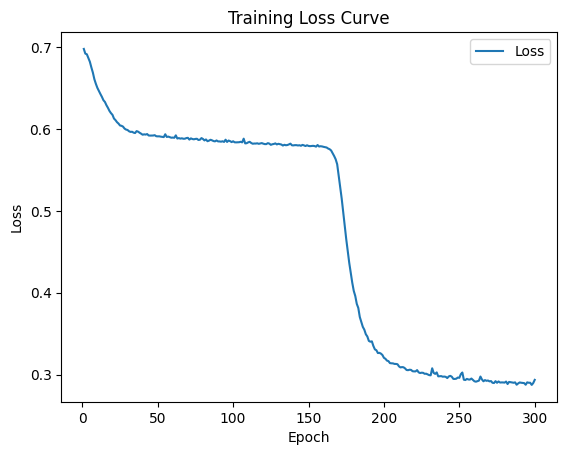

In [400]:
# Plot the loss curve
plt.plot(range(1, epochs + 1), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

In [401]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

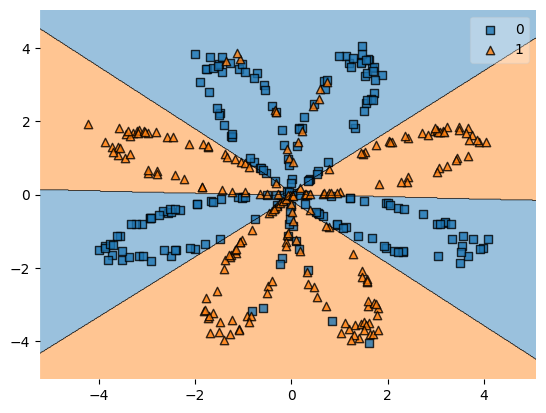

In [402]:
plot_decision_regions(x,y.reshape(-1,),my_predictor)

## 7. Experiments 1: Try LeakyReLU as `activation_1` with the size of `hidden_1` = 4, 5, and 10. You can reuse the same model without copying it.

In [403]:
def train_and_plot(hidden_1_size):
    """
    Train the model with a given hidden_1_size and plot the decision boundary.

    Args:
        hidden_1_size (int): The size of the first hidden layer.
    """
    # Initialize the model with LeakyReLU as activation_func_1
    activation_func_1 = nn.LeakyReLU()
    activation_func_2 = nn.Sigmoid()
    hidden_2_size = 4 # Keep hidden_2_size fixed
    input_size = 2  # Number of input features

    # Reinitialize the model
    model = MyModel(input_size, hidden_1_size, hidden_2_size, activation_func_1, activation_func_2)

    # Define the loss function and optimizer
    loss_fn = BCELoss()
    optimizer = Adam(model.parameters(), lr=0.01)

    # Train the model
    epochs = 300
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch in data_loader:
            x_batch, y_batch = batch

            # Forward pass
            predictions = model(x_batch)
            loss = loss_fn(predictions, y_batch)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate loss
            epoch_loss += loss.item()

        # Store the average loss for this epoch
        loss_history.append(epoch_loss / len(data_loader))

    # Plot the loss curve
    plt.plot(range(1, epochs + 1), loss_history, label=f"Hidden_1_Size={hidden_1_size}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.legend()
    plt.show()

    # Plot the decision boundary
    predictor = MyPrediction(model)
    plot_decision_regions(x, y.reshape(-1,), predictor)
    plt.title(f"Decision Boundary (Hidden_1_Size={hidden_1_size})")
    plt.show()

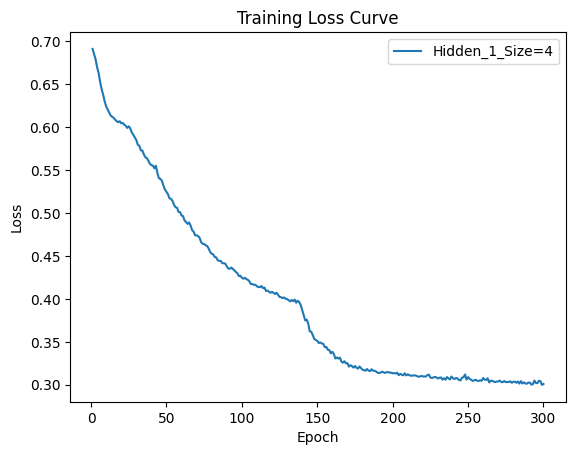

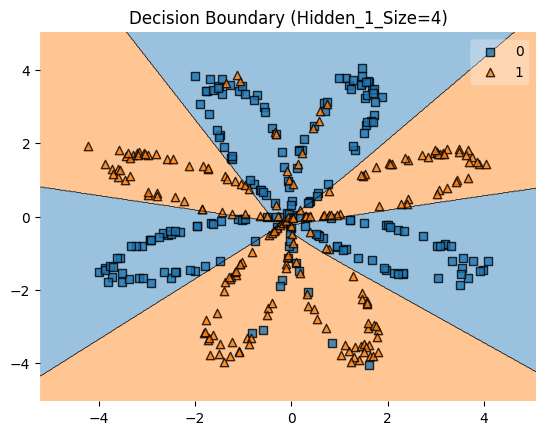

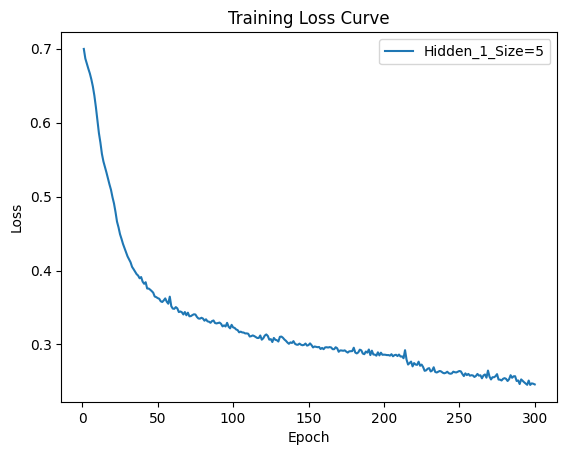

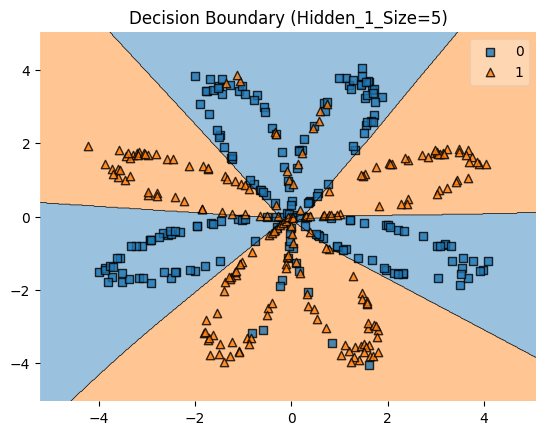

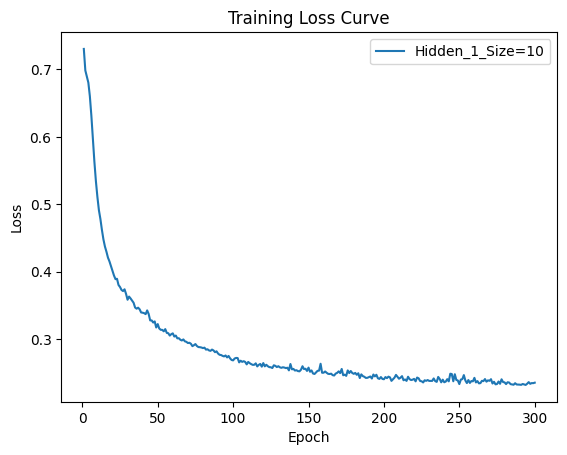

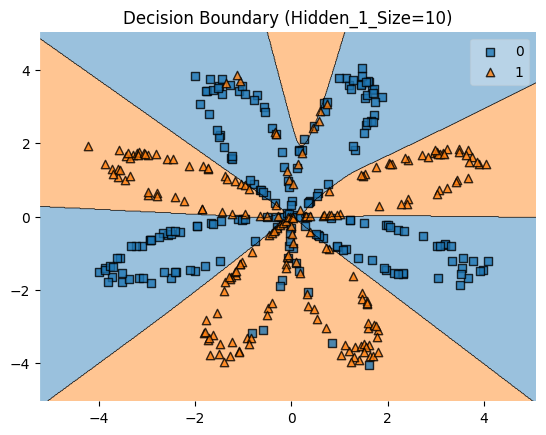

In [404]:
# Experiment with different hidden_1_size values
for hidden_1_size in [4, 5, 10]:
    train_and_plot(hidden_1_size)

## 8. (3 pt) Comment on the number of the straight lines with respect to the size of the hidden layer.

When plotting the decision boundaries, I don't see any truly linear boundaries. But I assume that's not exactly what we are being asked to comment on.
<br/>
<br/>
If we are just considering the lines we see that are separating the decision boundaries, then when we have a `hidden_1` of size 4 we get 6 lines. It is hard to see how the lines move near the very center of the plot, so for simplicity I will assume that the lines all meet near the center.
<br/>
<br/>
When we have a `hidden_1` of size 5, the decision boundaries look nearly identical to when it was size 4, with 6 lines on the plot. But when have a `hidden_1` of size 10, there is a noticable difference. This time there is a new, small decision boundary for the 1's classification near the top of the plot (it's sitting inside of a region for the 0's classification). This increases the number of lines we see, which leads to me to believe that increasing the `hidden_1` size correlates to an increase in complexity of the decision boundary (meaning more lines).

## 9. Experiments 2: with the `hidden_1` layer of the size 4 try Sigmoind, ReLU, LeakyReLU, ELU, and SiLU as `activation_1`. Do this for batch sizes 4 and 50.

## 10. (4 pt) Comment on the shape of the decision boundaries with respect to the activation function and the batch size. Did you adjust the learning rate? Did you try to start with small learning rate like 0.001 instead of 0.01 and if so, which worked better?